P. SREE VIDYA


ROLE : DATA SCIENTIST


OASIS INFOBYTE - TASK 4

TASK: EMAIL SPAM DETECTION WITH MACHINE LEARNING




In [5]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [6]:
#loading and preproseccing the data
data = pd.read_csv('/content/spam.csv', encoding='latin1')
data.head()



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data = data[['v1', 'v2']]  # Keep only the relevant columns
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.columns = ['label', 'email_text']  # Rename the columns

In [9]:
data.dropna(inplace=True)  # Drop any rows with missing values

In [10]:
data['email_text'] = data['email_text'].str.strip()  # Remove leading/trailing white spaces

 Perform data visualization

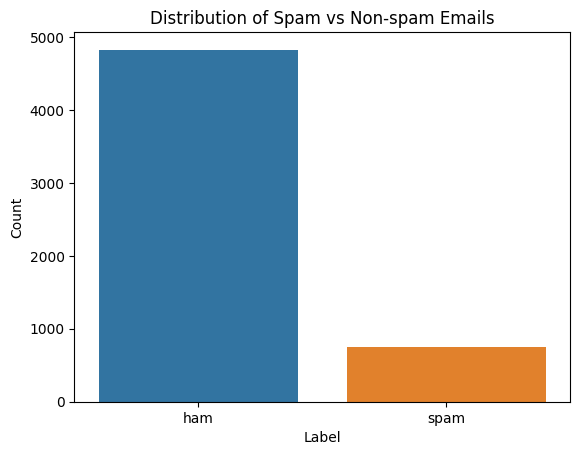

In [11]:
#count plot
sns.countplot(data=data, x='label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Spam vs Non-spam Emails')
plt.show()


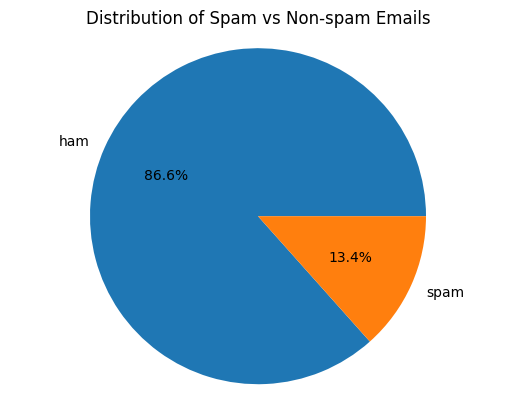

In [12]:
#Pie chart

label_counts = data['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Spam vs Non-spam Emails')
plt.axis('equal')
plt.show()


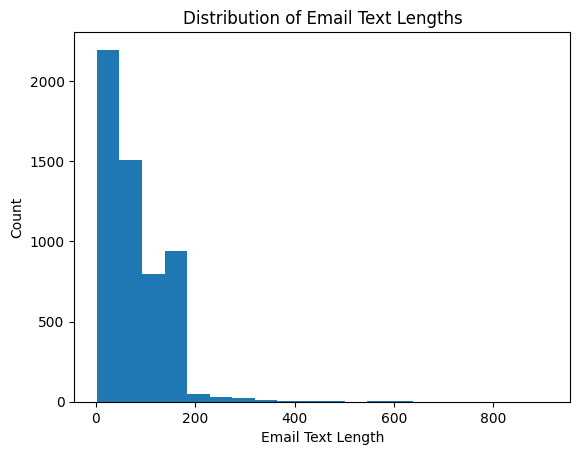

In [13]:
#Histogram

plt.hist(data['email_text'].str.len(), bins=20)
plt.xlabel('Email Text Length')
plt.ylabel('Count')
plt.title('Distribution of Email Text Lengths')
plt.show()


In [14]:
# preprocessing the Data
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [15]:
X = data['email_text']  # Email text column
y = data['label']  # Spam or non-spam label column

In [16]:
#Perform feature extraction using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [17]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Create and train the Support Vector Machine (SVM) classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
#Make predictions on the test set
y_pred = classifier.predict(X_test)

Evaluation of model

In [20]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.979372197309417
Confusion Matrix:
[[963   2]
 [ 21 129]]
